# DTDDB Session 16 Compulsory Exercise

This assignment involves designing and fitting basic linear regression models and exploring unknown data.

## ☠ Please read the instructions carefully: ☠

>Your task is to complete this mandatory exercise, 
>
>then save the .ipynb file and upload it to https://eksamen.cbs.dk/
>
>The deadline is Monday the 8th at 12:30
>
>Grading is **PASS** OR **FAIL**
>
>You should answer all the questions by
>
> a) providing the correct Python code
>
> b) explaining (❗) the code you have written in your own words (either as markdown or comment)
>
> Answers that are not your own (plagiarised) will lead to an automatic fail
>
>You may work in groups but your submissions must be individual, i.e. you each have to provide a functioning .ipynb file with YOUR writing and explanation
>
>If you get stuck, move to the next question - perhaps it will help you solve an earlier one.
>
>☢ Read the instructions for each task carefully! ☢

# --> Note that for this exercise description (text) is just as (or even more) important than the code itself. You should demonstrate your ability to interpret descriptive statistics and OLS regression models.

## Part 1: Setup the environment and prepare your data (3 Points)

### First, import your key libraries: **pandas**, **statsmodels.api**

In [3]:
import pandas as pd #i download pandas and rename it as pd
import statsmodels.api as st #i download statsmodels and rename it as st

### Now, load the two data sets **avg_world_temp_2020.csv** and **drinks.csv** into DataFrames. (1P)

The first data set contains the average temperatures per country scraped from Wikipedia. *Source: (https://www.kaggle.com/efradgamer/world-average-temperature)*

The second data set contains alcohol consumption per capita for various countries. *Source: Source: World Health Organisation, Global Information System on Alcohol and Health (GISAH), 2010*


In [40]:
# I use the panda function .read to have the program read the dataframes in to the assignment
avg_temp = pd.read_csv('avg_world_temp_2020.csv')
drinks = pd.read_csv('drinks.csv')

### We are interested in the annual average temperature per country. Aggregate your data at the country level. (1P)

*Hint: You can use panda's .groupby(..) function. Read up on it [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). Make sure to set the "as_index=False" parameter if you want to access the columns.*

In [38]:
avg_temp.groupby(by = ['Country'], as_index = False).mean()
#I use the .groupby method to have the dataframe grouped by the countries. In the brackets i first define what the datafram
#should be grouped by by writing "by = ['Country']". then i use the .mean() method to get the avrage.

,Country,Unnamed: 0,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg_Year
0,Afghanistan,109.0,-2.300000,-0.700000,6.300000,12.800000,17.300000,22.800000,25.000000,24.100,19.700000,13.100000,5.900000,0.600,12.100000
1,Albania,184.0,6.700000,7.800000,10.000000,13.400000,18.000000,21.600000,24.000000,23.800,20.700000,16.000000,11.700000,8.100,15.200000
2,Algeria,1.0,13.333333,15.033333,18.000000,21.600000,25.333333,28.866667,31.033333,30.600,28.400000,23.666667,18.166667,14.600,22.466667
3,Angola,3.0,26.700000,28.500000,28.600000,28.200000,27.000000,23.900000,22.100000,22.100,23.500000,25.200000,26.700000,26.900,25.800000
4,Antigua and Barbuda,246.0,25.400000,25.200000,25.600000,26.300000,27.200000,27.900000,28.200000,28.300,28.100000,27.500000,26.800000,25.900,26.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Venezuela,423.0,20.200000,20.800000,21.700000,22.700000,23.200000,22.600000,22.200000,22.300,22.700000,22.400000,22.000000,20.700,22.000000
169,Vietnam,179.5,19.925000,20.750000,22.500000,24.600000,25.950000,26.225000,26.150000,25.875,25.150000,23.975000,22.400000,20.625,23.675000
170,Yemen,182.5,20.850000,22.000000,23.600000,24.450000,26.500000,27.850000,28.350000,27.250,26.800000,23.450000,21.550000,20.500,24.550000
171,Zambia,105.0,21.966667,21.833333,21.733333,20.766667,18.300000,15.900000,15.900000,18.600,22.566667,24.466667,23.666667,22.100,20.666667


### Clean up your data by removing the columns for monthly average (Jan, Feb, Mar, etc.) (1P)

In [49]:
#I write the name of the column i want to see in brackets after the () which results in me only having the country collumn
#and the Avg_Year collumn.
group_avg = avg_temp.groupby(by = ['Country'], as_index = False)['Avg_Year'].mean()

#Then i simply type the name of the new data set (the grouped one) and it the code then prints a table with the data frame
group_avg

,Country,Avg_Year
0,Afghanistan,12.100000
1,Albania,15.200000
2,Algeria,22.466667
3,Angola,25.800000
4,Antigua and Barbuda,26.900000
...,...,...
168,Venezuela,22.000000
169,Vietnam,23.675000
170,Yemen,24.550000
171,Zambia,20.666667


## Part 2: Explore your data and compute summary statistics (8 Points)

Your next task is to combine the two data sets. To do this you can use panda's **.merge()** function. It is very useful, read up on it [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). If you want to keep only those observations that occur in both data sets, you should set the **how="inner"** parameter. To specify the names of the columns you wish to combine the data sets with use the **left_on=** and **right_on=** parameters. Think back to the lecture on relational databases - the principle is the same! 

In [52]:
#I create a new variable by merging the two wanted data frames together.
#i start my merge method by typing the first data set i want merged and then .merge()
#The i start by typing the name of the other data set i want merged with my first df followed by how i want it merged
#I type how = 'inner' to keep the order og the left keys through interception of keys that apears in both df's
#Then i type left- and right_on and set equal to 'Country' as i want the two df's country collumn's to be merged
drinks_by_country = group_avg.merge(drinks, how = "inner", left_on = 'Country', right_on = 'Country')

#finally i type the name of my new df in order to have it printed out in a table
drinks_by_country

,Country,Avg_Year,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,12.100000,0,0,0,0.0
1,Albania,15.200000,89,132,54,4.9
2,Algeria,22.466667,25,0,14,0.7
3,Angola,25.800000,217,57,45,5.9
4,Argentina,15.247059,193,25,221,8.3
...,...,...,...,...,...,...
142,Venezuela,22.000000,333,100,3,7.7
143,Vietnam,23.675000,111,2,1,2.0
144,Yemen,24.550000,6,0,0,0.1
145,Zambia,20.666667,32,19,4,2.5


Compute some summary statistics for the main columns and explain your findings. What attributes of the data do the columns represent and how are they measured? 

In [62]:
#I use the .describe() method to get the summary statistics 
drinks_by_country.describe()

#The mean shoes the avarage of the different coulms from each country
#The std is the standard deviation which describes the spread of the variables in the data frame
#The thre % numbers describes how much of the data in the variable are within each quartile
#Max and Min is the largest and the lowest value excluding outliers


,Avg_Year,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,19.278690,110.721088,78.775510,55.448980,4.861224
std,7.378666,103.754636,80.571486,85.141396,3.905378
min,-0.400000,0.000000,0.000000,0.000000,0.000000
25%,12.570000,20.000000,5.500000,1.000000,1.300000
50%,20.700000,77.000000,65.000000,9.000000,4.600000
75%,26.075000,193.500000,122.000000,79.500000,8.200000
max,29.900000,361.000000,373.000000,370.000000,14.400000


Create visualisations (histograms or boxplots) of the most important attributes (at least amount of alcohol consumed yearly and average temperature yearly).

array([[<AxesSubplot:title={'center':'total_litres_of_pure_alcohol'}>,
        <AxesSubplot:title={'center':'Avg_Year'}>],
       [<AxesSubplot:title={'center':'wine_servings'}>, <AxesSubplot:>]],
      dtype=object)

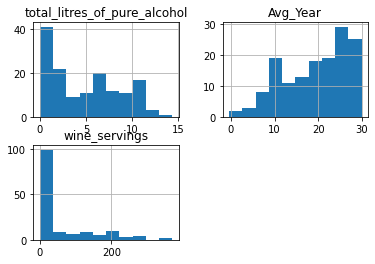

In [90]:
#i use the .hist method to have the program print out the wanted histograms.
#In the () i create i list of the column names i want visualized using the [] 
drinks_by_country.hist(['total_litres_of_pure_alcohol', 'Avg_Year', 'wine_servings'])


<AxesSubplot:>

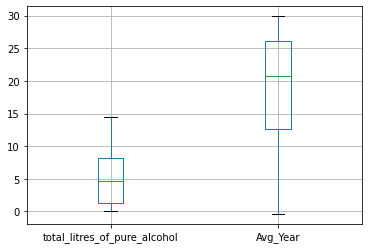

In [70]:
#i use the .boxplot method to have the program print out my boxplot's
#in order to have more than one pox plot in the same print i type coulumn and the make that equal to a list of the
#column names i want visualized
drinks_by_country.boxplot(column = ['total_litres_of_pure_alcohol', 'Avg_Year'])

Do any observations seem out of the ordinary (e.g. particularly high or low)? Single out noteworthy observations and describe them. 

In [117]:
#The fact that some countries cosume no alcohol at all seems out of the ordenary. this number coudl be caused by
#data manipulation or just becuause the country has a very differet culture when it comes to acohol

#Another dodgy observation is that the max value of total of pure alcohol for one country is near 15 liters! I am asumin that
#anually which means that one of the countries in the data fram has a monthly alcohol consumtion of more then a liter of pure
#alchol! I am gussing this data fram should take children in to acount which just makes the number even more absurd

Calculate a correlation matrix (use Pearson's method) for your data. Describe the correlations that you find in terms of their intensity. What do the values mean and how should they be interpreted?

In [126]:
# I use the peason method as assigned, however for me to se the difference in the correlation coefficients in the diffrent
#methods have i also printed three other methods (just for fun)

drinks_by_country.corr(method = 'pearson')


#the values in the table are the correlation coefficientcies. Thy discribe how losly two variables a correlated compared to the
#performed regression. The closer to 1 or -1 on the value is the stronger is the correlation

,Avg_Year,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
Avg_Year,1.000000,-0.518637,-0.430063,-0.504260,-0.589281
beer_servings,-0.518637,1.000000,0.511758,0.559788,0.860221
spirit_servings,-0.430063,0.511758,1.000000,0.202917,0.654059
wine_servings,-0.504260,0.559788,0.202917,1.000000,0.691967
total_litres_of_pure_alcohol,-0.589281,0.860221,0.654059,0.691967,1.000000


In [124]:
drinks_by_country.corr(method = 'kendall')

,Avg_Year,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
Avg_Year,1.000000,-0.328146,-0.290251,-0.381088,-0.364599
beer_servings,-0.328146,1.000000,0.485268,0.552549,0.742007
spirit_servings,-0.290251,0.485268,1.000000,0.381637,0.558292
wine_servings,-0.381088,0.552549,0.381637,1.000000,0.609298
total_litres_of_pure_alcohol,-0.364599,0.742007,0.558292,0.609298,1.000000


In [125]:
drinks_by_country.corr(method = 'spearman')

,Avg_Year,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
Avg_Year,1.000000,-0.474023,-0.407317,-0.561558,-0.536704
beer_servings,-0.474023,1.000000,0.673890,0.751426,0.902658
spirit_servings,-0.407317,0.673890,1.000000,0.538726,0.732490
wine_servings,-0.561558,0.751426,0.538726,1.000000,0.792420
total_litres_of_pure_alcohol,-0.536704,0.902658,0.732490,0.792420,1.000000


## Part 3: Design and fit a linear OLS regression model (9 Points)

Management has decided that the *average yearly temperature* predicts *per capital alcohol consumption*. You are requested to test this hypothesis. Build and fit an ordinary-least-squares regression model to your data. Report your findings in a brief text that includes key statistics and a visualisation of the line of fit. Is management's model a good fit for the data? If not, what might the reason be?

*Hint: use the statsmodels library to fit an OLS model. Read up on it [here](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html). Don't forget to use statsmodels **.add_constant(X)** to include intercept estimation. You can use **.graphics.plot_fit(...)** to visualise your findings.* 

In [76]:
import statsmodels.api as sm 

In [127]:
#I start of by assigning a value to my x and y axis to create a regression descrbing the corealation between the
#avg temp and avg alchol consumption if different countries
x = drinks_by_country['Avg_Year']
y = drinks_by_country['total_litres_of_pure_alcohol']

#I use the .add_constant(x) to have the program estimate the interception with the y-axis
x = sm.add_constant(x)

#Finnaly i define my regression by using the OLS format from the statsmodels
regression = sm.OLS(y, x).fit()

#And i ask the program to print out a summary
regression.summary()

#We can se that the p value is very close to 0 (proberbly not 0 tho as that should be imposible) this would indicate a strong
#could idicate that the hypothesis is correct. However, The R^2 value is very far from 1 which indicates a weak correlation
#between the two variables. This give the pval a low credibility which brings me to the conclsion that there is no
#statistical evidence in this data frame which indicates that the avg temp predicts the avg acohol consumption in a country


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_litres_of_pure_alcohol   R-squared:                       0.347
Model:                                      OLS   Adj. R-squared:                  0.343
Method:                           Least Squares   F-statistic:                     77.14
Date:                          Sun, 07 Nov 2021   Prob (F-statistic):           4.11e-15
Time:                                  12:20:21   Log-Likelihood:                -377.00
No. Observations:                           147   AIC:                             758.0
Df Residuals:                               145   BIC:                             764.0
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8741      0.733     14.840      0.000       9.426      12.322
Avg_Year      -0.3119      0.036     -8.783      0.000      -0.382      -0.242
==============================================================================
Omnibus:                       11.640   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                4.533
Skew:                          -0.091   Prob(JB):                        0.104
Kurtosis:                       2.159   Cond. No.                         58.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

🔺 **FINAL GRADE** - / 20 :

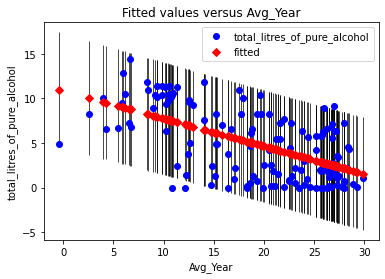

In [139]:
#I use the graphics tool from the statsmodels import to visualize the data aswell as the linear regression
#When i first typed the code it created two identical diagrams so i tried defining it and then i only had one
#not sure why tho haha
fg = sm.graphics.plot_fit(regression, "Avg_Year")
